In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging

sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from io_utils import load_data_from_file
from main_methods import multitest_rejections
from plot_utils import plot_venn

# load the data for a given replicate

def load_method_result(data, rep, method):
    ddir = '/share/PI/sabatti/sc_data/spatial_ge/scGCO'
    if data == 'MouseOB':
        alpha = 0.01 # default FDR level
    else:
        alpha = 0.05
    if method == 'scGCO':
        if data == 'MERFISH':
            fn = '{}_result_df.csv'.format(data)
        elif data == 'MouseOB':
            fn = 'Rep{}_result_df.csv'.format(rep)
        elif data == 'BreastCancer':
            fn = "Layer{}_BC_pattern_conserved_df_exp.csv".format(rep)
        fileName = ddir + "/data/{}/scGCO_results/".format(data) + fn
        result_df = pd.read_csv(fileName, index_col=0)
        result_df = result_df[result_df.fdr < alpha].sort_values(by=['fdr'])
        out = set(result_df.index.values)
    if method == 'spatialDE':
        if data == 'MERFISH':
            fn = 'middle_final_results.csv'
        elif data == 'MouseOB':
            fn = 'Rep{}_MOB_results.csv'.format(rep)
        elif data == 'BreastCancer':
            fn = "Layer{}_BC_final_results.csv".format(rep)
        de = ddir + "/data/{}/spatialDE_results/".format(data) + fn
        counts_de = pd.read_csv(de,index_col=0)
        counts_de=counts_de[counts_de.qval<alpha]
        counts_de=counts_de[counts_de.g.values != 'log_total_count']
        out = set(counts_de.g.values)
    if method == 'ours':
        if data == 'MERFISH':
            fn = '{}_result_df.csv'.format(data)
        elif data == 'MouseOB':
            fn = 'Rep{}_result_df.csv'.format(rep)
        elif data == 'BreastCancer':
            fn = "Layer{}_result_df.csv".format(rep)
        fn =  ddir + '/data/{}/our_results/'.format(data) + fn
        result = load_data_from_file(fn, 'csv')
        rej_idx = multitest_rejections(result['pvalue'], alpha, method="BH")
        out = set(result['geneID'][rej_idx])
    if method == 'trendsceek':
        if data == 'BreastCancer':
            assert rep == 2, 'rep {} not available for trendsceek'.format(rep)
            fn = 'BC2_sig_gene_list.csv'
        else:
            assert 0, '{} not available for trendsceek'.foramt(data)
        fn = ddir + "/data/BreastCancer/trendsceek_results/" + fn
        counts_sceek=pd.read_csv(fn, index_col=0)
        out = set(counts_sceek.sig_gene.values)
    print('{} rejected {} genes'.format(method, len(out)))
    return out

def plot_multi_reps(res, methods, reproduce=False):
    if reproduce:
        fig, axes = plt.subplots(1, len(methods), figsize=(4*len(methods),3))
        for i, m in enumerate(methods):
            dd = {'Rep: {}'.format(k): res[k][m] for k in res}
            ax = axes[i]
            plot_venn(dd, list(dd.keys()), ax=ax)
            ax.set_title(m)
    else:
        fig, axes = plt.subplots(1, len(res.keys()), figsize=(4*len(res.keys()),3))
        for i, val in enumerate(res.keys()):
            ax = axes[i]
            plot_venn(res[val], methods, ax=ax)
            ax.set_title('Rep {}'.format(val))
    plt.show()

methods = ['scGCO', 'spatialDE', 'ours']

scGCO rejected 84 genes
spatialDE rejected 91 genes
ours rejected 134 genes


/home/users/jjzhu/.ve/aloe/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


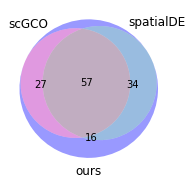

In [31]:
data = 'MERFISH'
rep = 0
gsets = {m : load_method_result(data, rep, m) for m in methods}
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plot_venn(gsets, methods, ax=ax)
plt.show()

MouseOB_9
scGCO rejected 327 genes
spatialDE rejected 94 genes
ours rejected 180 genes
MouseOB_10
scGCO rejected 1330 genes
spatialDE rejected 391 genes
ours rejected 909 genes
MouseOB_11
scGCO rejected 751 genes
spatialDE rejected 35 genes
ours rejected 296 genes


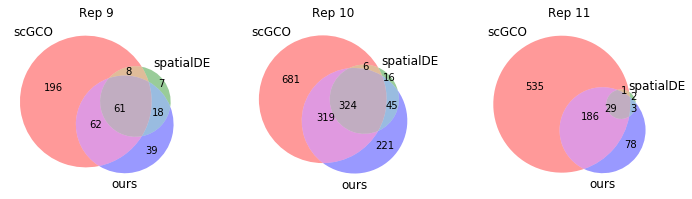

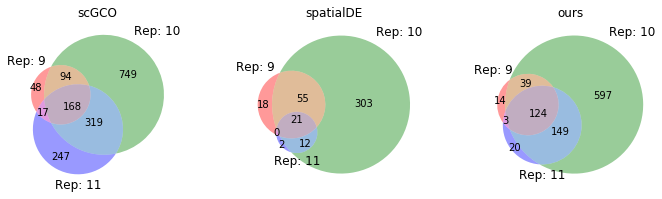

In [49]:
data = 'MouseOB'
res = {}
for rep in [9, 10, 11]:
    print('{}_{}'.format(data, rep))
    res[rep] = {m : load_method_result(data, rep, m) for m in methods}
plot_multi_reps(res, methods)
plot_multi_reps(res, methods, reproduce=True)

BreastCancer_1
scGCO rejected 121 genes
spatialDE rejected 146 genes
ours rejected 30 genes
BreastCancer_2
scGCO rejected 118 genes
spatialDE rejected 115 genes
ours rejected 56 genes
BreastCancer_3
scGCO rejected 77 genes
spatialDE rejected 90 genes
ours rejected 18 genes
BreastCancer_4
scGCO rejected 90 genes
spatialDE rejected 50 genes
ours rejected 28 genes


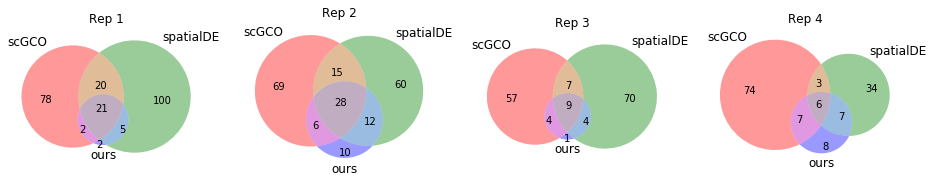

In [69]:
data = 'BreastCancer'
res = {}
methods = ['scGCO', 'spatialDE', 'ours']
for rep in range(1,5):
    print('{}_{}'.format(data, rep))
    res[rep] = {m : load_method_result(data, rep, m) for m in methods}
plot_multi_reps(res, methods)

trendsceek rejected 15 genes
spatialDE rejected 115 genes
ours rejected 56 genes


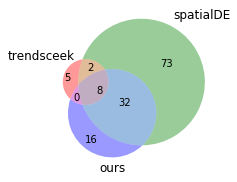

trendsceek rejected 15 genes
spatialDE rejected 115 genes
scGCO rejected 118 genes


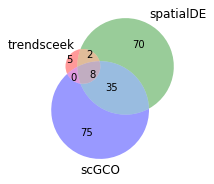

In [66]:
data = 'BreastCancer'
rep = 2
methods = ['trendsceek', 'spatialDE', 'ours']
gsets = {m : load_method_result(data, rep, m) for m in methods}
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plot_venn(gsets, methods, ax=ax)
plt.show()
methods = ['trendsceek', 'spatialDE', 'scGCO']
gsets = {m : load_method_result(data, rep, m) for m in methods}
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plot_venn(gsets, methods, ax=ax)
plt.show()